In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns

## load in cleaned pickled dataframe

In [3]:
clean_df = pd.read_pickle('../data/pickled/cleaned_df.pkl')

In [4]:
# resetting the index
clean_df.reset_index(level=0, inplace=True)

In [5]:
# creaing a column with just the year
clean_df['Year'] = pd.DatetimeIndex(clean_df['Date Occurred']).year

In [6]:
clean_df.head(3)

Date Occurred  DR Number  Time Occurred  Area ID Area Name  \
0    2010-01-01  102120693           1117       21   Topanga   
1    2010-01-01  100504041           2130        5    Harbor   
2    2010-01-01  100504042           1600        5    Harbor   

   Reporting District  Crime Code  \
0                2156         354   
1                 563         420   
2                 519         510   

                            Crime Code Description  Victim Age Victim Sex  \
0                                THEFT OF IDENTITY          21          M   
1  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)           0          X   
2                                 VEHICLE - STOLEN           0          X   

  Victim Descent  Premise Code Premise Description Status Code  \
0              H         404.0    DEPARTMENT STORE          IC   
1              X         104.0            DRIVEWAY          IC   
2              X         101.0              STREET          IC   

  Status Description latitude  longitude  Year  
0        Invest Cont  34.1875   -118.603  2010  
1        Invest Cont   33.737  -118.2967  2010  
2        Invest Cont  33.7926  -118.2468  2010

### Renaming Values for Categorial Variables

In [7]:
clean_df['Victim Descent'] = clean_df['Victim Descent'].replace({'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese',
               'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian',
               'H': 'Latinx', 'I': 'Native', 'J': 'Japanese', 
               'K': 'Korean', 'L': 'Laotian', 'O': 'Other',
               'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian',
               'V': 'Vietnamese', 'W': 'White',  'X': 'Unknown', 'Z':'Asian Indian'})

In [8]:
clean_df['Victim Sex'] = clean_df['Victim Sex'].replace({'F': 'Female', 'M': 'Male', 'X': 'Unknown'})

In [9]:
# checking that it all worked
clean_df.head(1)

Date Occurred  DR Number  Time Occurred  Area ID Area Name  \
0    2010-01-01  102120693           1117       21   Topanga   

   Reporting District  Crime Code Crime Code Description  Victim Age  \
0                2156         354      THEFT OF IDENTITY          21   

  Victim Sex Victim Descent  Premise Code Premise Description Status Code  \
0       Male         Latinx         404.0    DEPARTMENT STORE          IC   

  Status Description latitude longitude  Year  
0        Invest Cont  34.1875  -118.603  2010

In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993259 entries, 0 to 1993258
Data columns (total 18 columns):
Date Occurred             datetime64[ns]
DR Number                 int64
Time Occurred             int64
Area ID                   int64
Area Name                 object
Reporting District        int64
Crime Code                int64
Crime Code Description    object
Victim Age                int64
Victim Sex                object
Victim Descent            object
Premise Code              float64
Premise Description       object
Status Code               object
Status Description        object
latitude                  object
longitude                 object
Year                      int64
dtypes: datetime64[ns](1), float64(1), int64(7), object(9)
memory usage: 273.7+ MB


## Graphing

In [11]:
# clean_df.hist(figsize=(15,15)) 
# plt.tight_layout()
# plt.show()

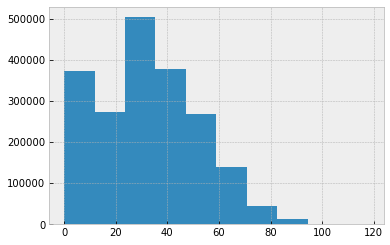

In [12]:
clean_df['Victim Age'].hist()

In [13]:
# value counts
# clean_df['Victim Sex'].value_counts(sort=True).nlargest(10).plot.bar()

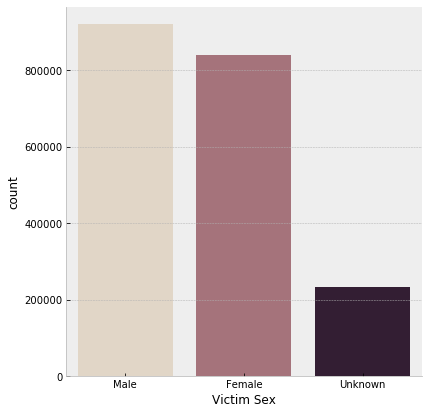

In [14]:
# value counts
sex_plot = sns.catplot(x='Victim Sex', kind="count", palette="ch:.25", data=clean_df, order= clean_df['Victim Sex'].value_counts().index)
sex_plot.fig.set_size_inches(6,6)

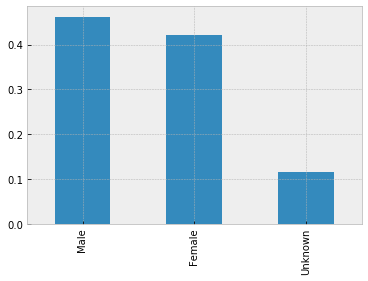

In [15]:
# percentage
clean_df['Victim Sex'].value_counts(sort=True, normalize=True).nlargest(10).plot.bar()

In [16]:
clean_df['Victim Descent'].value_counts()

Latinx              685420
White               483035
Black               316944
Unknown             254243
Other               191600
Other Asian          47941
Korean                8703
Filipino              2358
Chinese                884
Native                 872
Japanese               352
Pacific Islander       326
Hawaiian               183
Vietnamese             150
Asian Indian           102
Guamanian               79
Samoan                  31
Cambodian               21
Laotian                 15
Name: Victim Descent, dtype: int64

Text(0, 0.5, 'Ethnicity')

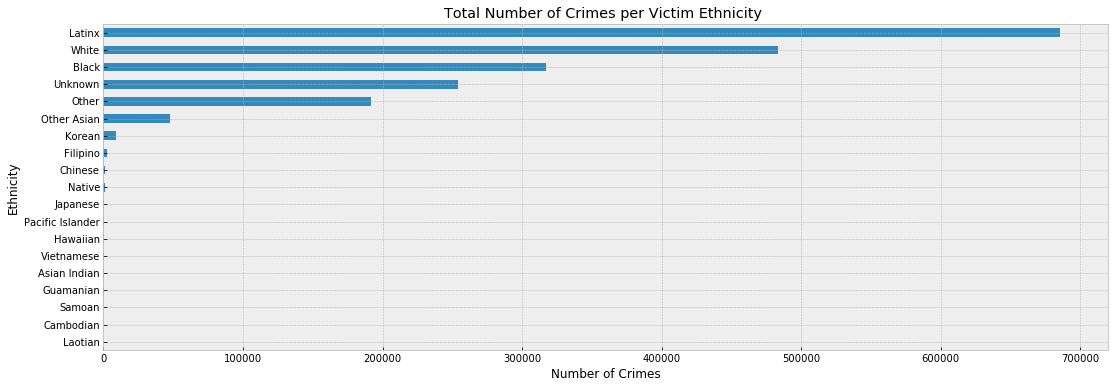

In [17]:
fig, ax = plt.subplots(figsize=(18, 6))

clean_df['Victim Descent'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Total Number of Crimes per Victim Ethnicity ')
plt.xlabel('Number of Crimes')
plt.ylabel('Ethnicity')

# plt.savefig('visualizations/orig_time_data.png', bbox_inches = "tight", pad_inches=.5)


Text(0, 0.5, 'Ethnicity')

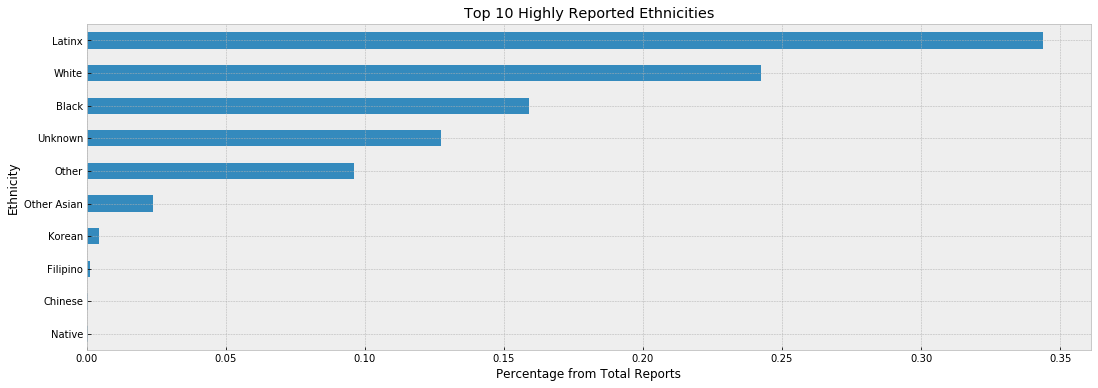

In [18]:
fig, ax = plt.subplots(figsize=(18, 6))

clean_df['Victim Descent'].value_counts(normalize=True)[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Highly Reported Ethnicities')
plt.xlabel('Percentage from Total Reports')
plt.ylabel('Ethnicity')

# plt.savefig('visualizations/orig_time_data.png', bbox_inches = "tight", pad_inches=.5)


In [19]:
# Top Victim Demographic Each Year ?

In [20]:
# clean_df.sort_values(by='Year', ascending=True)
# years = sorted(clean_df['Year'].unique())

# victims = clean_df.groupby('Year')['Victim Descent'].value_counts()

# fig, ax = plt.subplots(figsize=(13,6))
# ax.plot(years, victims)
# plt.show()

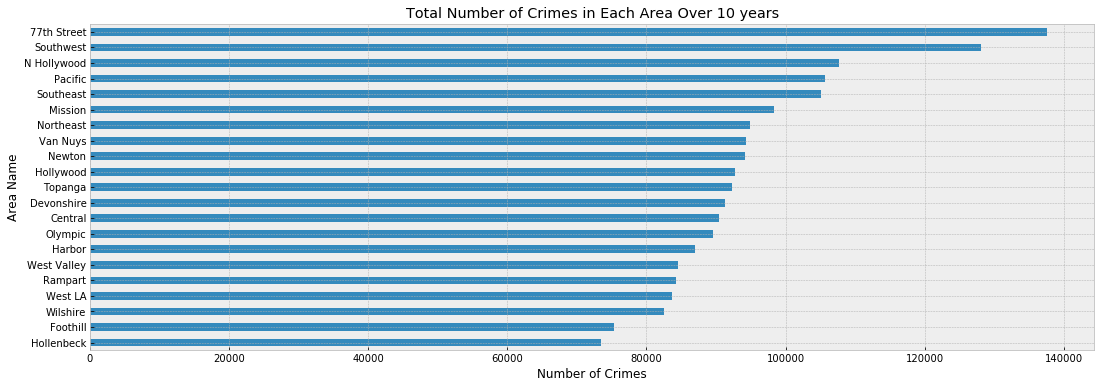

In [21]:
fig, ax = plt.subplots(figsize=(18, 6))
clean_df['Area Name'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Total Number of Crimes in Each Area Over 10 years')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')

plt.savefig('visualizations/area_counts.png', bbox_inches = "tight", pad_inches=.5)


In [22]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993259 entries, 0 to 1993258
Data columns (total 18 columns):
Date Occurred             datetime64[ns]
DR Number                 int64
Time Occurred             int64
Area ID                   int64
Area Name                 object
Reporting District        int64
Crime Code                int64
Crime Code Description    object
Victim Age                int64
Victim Sex                object
Victim Descent            object
Premise Code              float64
Premise Description       object
Status Code               object
Status Description        object
latitude                  object
longitude                 object
Year                      int64
dtypes: datetime64[ns](1), float64(1), int64(7), object(9)
memory usage: 273.7+ MB


In [23]:
# number of crimes each year
crime_year = clean_df.groupby('Year').size()

Text(0, 0.5, 'Number of Crimes')

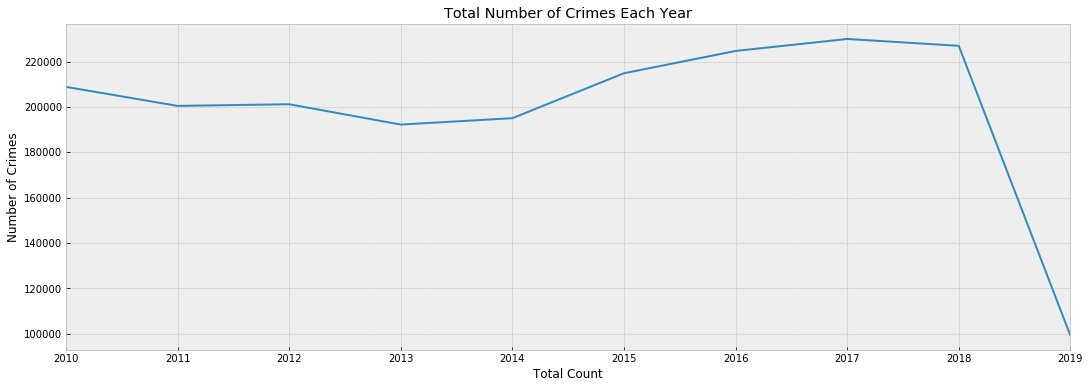

In [24]:
# plot the number of crimes for each year

fig, ax = plt.subplots(figsize=(18, 6))
clean_df.groupby('Year').size().plot()
plt.title('Total Number of Crimes Each Year')
plt.xlabel('Total Count')
plt.ylabel('Number of Crimes')

# crime_year.plot()

In [25]:
clean_df['Status Description'].unique()

array(['Invest Cont', 'Adult Other', 'Adult Arrest', 'Juv Arrest',
       'Juv Other', 'UNK'], dtype=object)

Text(0, 0.5, 'Number of Crimes')

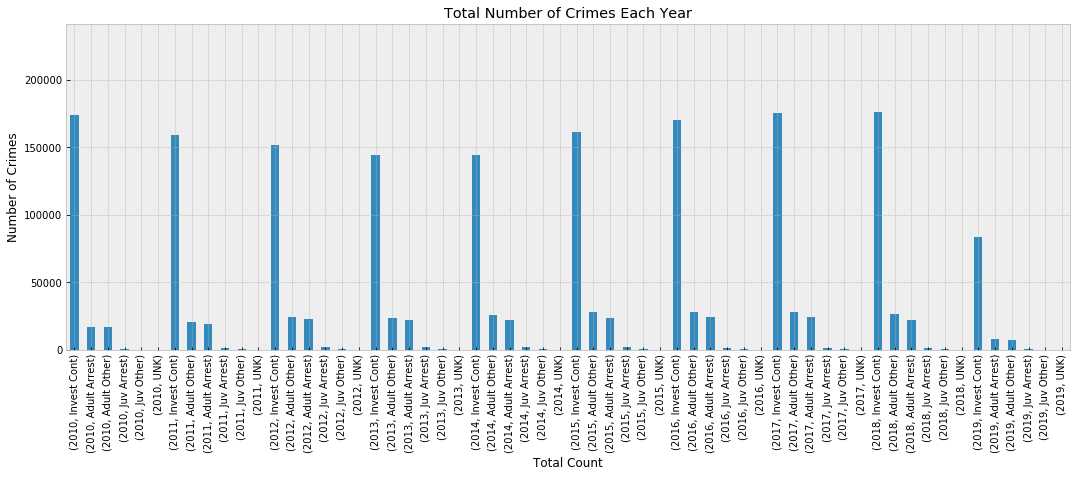

In [26]:
# was trying to add the number of ongoing invesigations each year to the above graph, but it didn't work out

fig, ax = plt.subplots(figsize=(18, 6))
clean_df.groupby('Year').size().plot()
clean_df.groupby('Year')['Status Description'].value_counts().plot(kind='bar')
plt.title('Total Number of Crimes Each Year')
plt.xlabel('Total Count')
plt.ylabel('Number of Crimes')

In [27]:
# clean_df.groupby('Year')['Status Description'].value_counts()

## Time Seres Graphs

In [28]:
# creating new df
date_df = clean_df.groupby('Date Occurred').size().reset_index()
date_df = date_df.set_index('Date Occurred')
date_df = date_df.rename({0: 'crime_count'}, axis='columns')

In [29]:
date_df.head()

crime_count
Date Occurred             
2010-01-01            2222
2010-01-02             533
2010-01-03             539
2010-01-04             558
2010-01-05             547

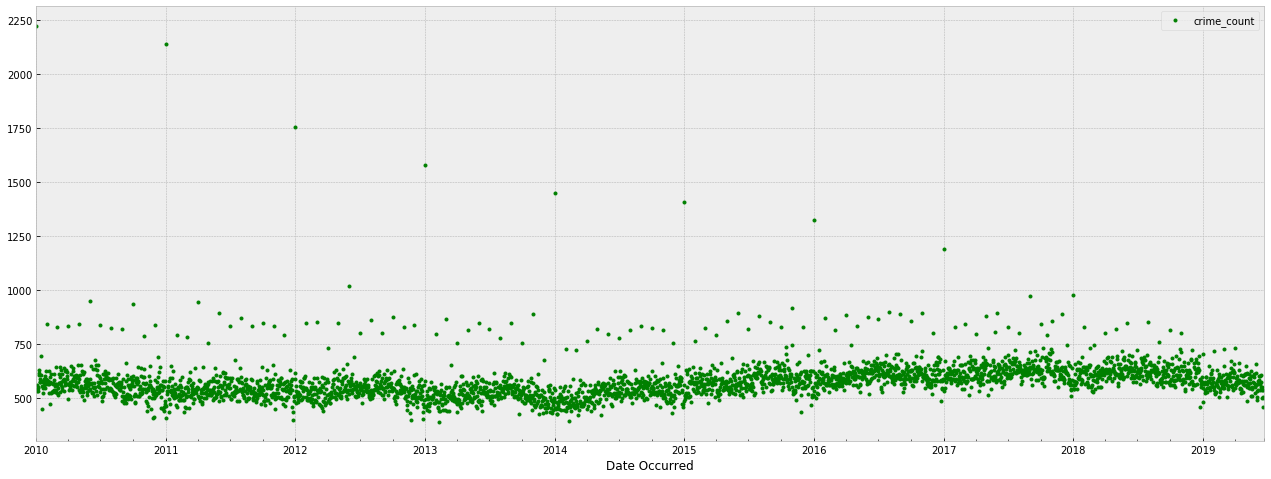

In [30]:
date_df.plot(figsize = (22,8), style = 'g.')
plt.show()

# add hues with some kind of binned variable?

### time series graph by `time occurred` column?

In [31]:
# clean_df['Time Occurred'] = pd.to_datetime(clean_df['Time Occurred'], format='%H')

In [32]:
# clean_df['Time Occurred'].unique

In [33]:
clean_df['Time Occurred'].describe()

count    1.993259e+06
mean     1.361522e+03
std      6.467373e+02
min      1.000000e+00
25%      9.300000e+02
50%      1.430000e+03
75%      1.900000e+03
max      2.359000e+03
Name: Time Occurred, dtype: float64

In [34]:
conditions = [(clean_df['Time Occurred'] <= 24),
            (clean_df['Time Occurred'] > 24) & (clean_df['Time Occurred'] < 100)]
choices = [(clean_df['Time Occurred'] *100), (clean_df['Time Occurred'] * 10)]
clean_df['Time Occurred'] = np.select(conditions, choices, clean_df['Time Occurred'])

In [35]:
clean_df['Time Occurred'].describe()

count    1.993259e+06
mean     1.378202e+03
std      6.234845e+02
min      1.000000e+02
25%      9.400000e+02
50%      1.430000e+03
75%      1.900000e+03
max      2.400000e+03
Name: Time Occurred, dtype: float64

In [36]:
# clean_df['Time Occurred'] = pd.to_datetime(clean_df['Time Occurred'], format='%H')

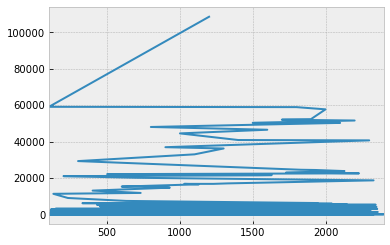

In [37]:
# this graph is not useable lol
clean_df['Time Occurred'].value_counts().plot()